<a href="https://colab.research.google.com/github/SamGrobelny/ASTRON1221/blob/main/week13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transit depth due to Earth: 8.405017877225196e-05
Transit depth due to Jupiter: 0.010560169441850946
Earth's orbital velocity: 29.784691829676934 km / s
Sun's radial velocity due to Earth: 8.945800466923792 cm / s
Jupiter's orbital velocity: 13.061451410903354 km / s
Sun's radial velocity due to Jupiter: 12.468386204118845 m / s
Alternative calculation of Sun's radial velocity due to Jupiter: 12.529091077198904 m / s
Mass ratio of Jupiter to Earth: 317.8284065946748
Earth's average density: 5.495021865555212 g / cm3


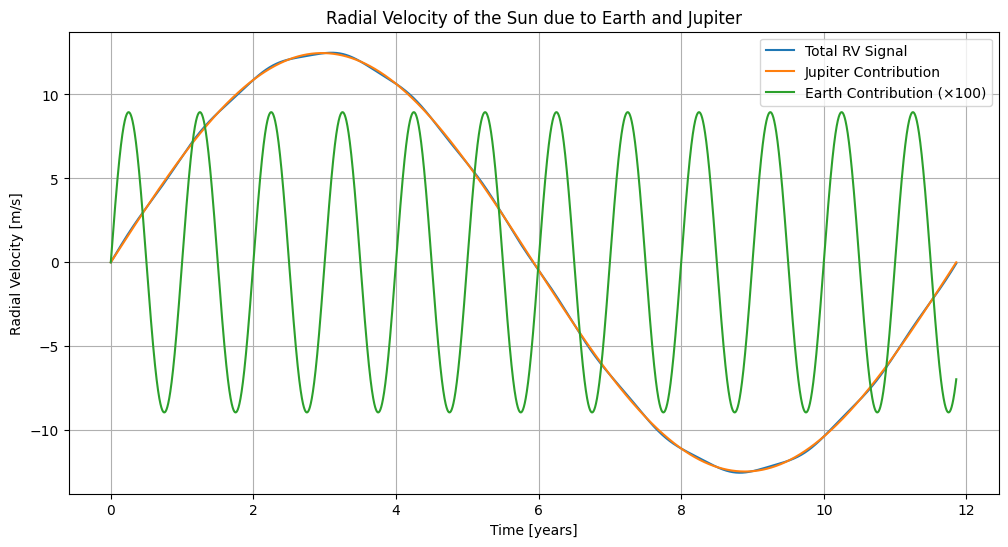

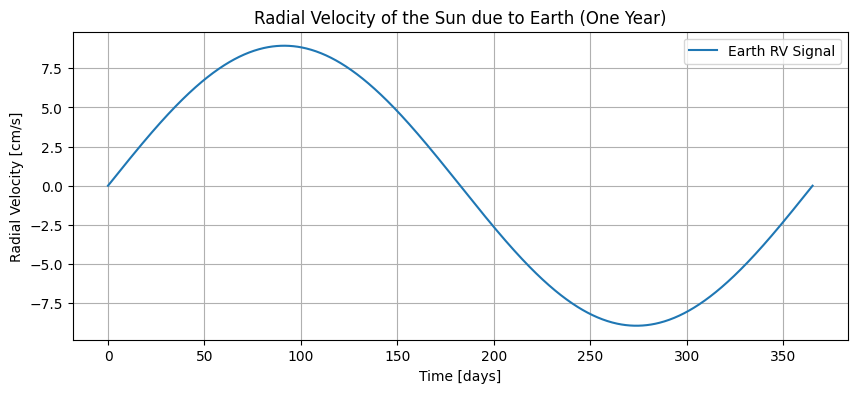

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import G, M_sun, M_earth, M_jup, R_sun, R_earth, R_jup, au # import only the needed variables from astropy constants instead of whole thing. This allows to just reference the variable instead of c.VAR.
from astropy import units as u

# Transit Depth Calculation
# The transit depth (delta) is the fraction by which a star's light dims when a planet transits in front of it.
delta_earth_sun = (R_earth / R_sun)**2
delta_jupiter_sun = (R_jup / R_sun)**2

print(f"Transit depth due to Earth: {delta_earth_sun.decompose()}")
print(f"Transit depth due to Jupiter: {delta_jupiter_sun.decompose()}")

# Earth's Orbital Velocity
# Using the formula v_orb = sqrt(G * M_sun / a)
v_orb_earth = np.sqrt(G * M_sun / au)
print(f"Earth's orbital velocity: {v_orb_earth.to(u.km / u.s)}")

# Sun's Radial Velocity Due to Earth
# Since m_p * v_p = m_s * v_s => v_s = (m_p / m_s) * v_p
v_sun_earth = (M_earth / M_sun) * v_orb_earth
print(f"Sun's radial velocity due to Earth: {v_sun_earth.to(u.cm / u.s)}")

# Jupiter's Orbital Velocity
a_jupiter = 5.2 * au  # Jupiter's semi-major axis
v_orb_jupiter = np.sqrt(G * M_sun / a_jupiter)
print(f"Jupiter's orbital velocity: {v_orb_jupiter.to(u.km / u.s)}")

# Sun's Radial Velocity Due to Jupiter
v_sun_jupiter = (M_jup / M_sun) * v_orb_jupiter
print(f"Sun's radial velocity due to Jupiter: {v_sun_jupiter.to(u.m / u.s)}")

# Alternative Calculation for Jupiter
# Using the approximate formula v_s = 0.09 m/s (m_p / m_earth) (P / 1 yr)^(-1/3)
v_s_jupiter_alt = 0.09 * u.m / u.s * (M_jup / M_earth) * (11.9 * u.yr / u.yr)**(-1.0/3.0)
print(f"Alternative calculation of Sun's radial velocity due to Jupiter: {v_s_jupiter_alt.to(u.m / u.s)}")

# Mass Ratio of Jupiter to Earth
mass_ratio_jupiter_earth = (M_jup / M_earth).decompose()
print(f"Mass ratio of Jupiter to Earth: {mass_ratio_jupiter_earth}")

# Earth's Average Density
rho_earth = M_earth / ((4 * np.pi * R_earth**3) / 3.0)
print(f"Earth's average density: {rho_earth.to(u.g / u.cm**3)}")

# Radial Velocity Signals Calculation
# Orbital periods
P_earth = (2 * np.pi * au / v_orb_earth).to(u.s)
P_jupiter = (2 * np.pi * a_jupiter / v_orb_jupiter).to(u.s)

# Time arrays over Jupiter's orbital period
t_total = np.linspace(0, P_jupiter.value, 10000) * u.s
t_total_years = t_total.to(u.year)

# Radial velocity signals
rv_earth = v_sun_earth.to(u.m / u.s).value * np.sin(2 * np.pi * t_total.value / P_earth.value)
rv_jupiter = v_sun_jupiter.to(u.m / u.s).value * np.sin(2 * np.pi * t_total.value / P_jupiter.value)
rv_total = rv_earth + rv_jupiter

# Plotting the Radial Velocity Signals
plt.figure(figsize=(12, 6))
plt.plot(t_total_years.value, rv_total, label='Total RV Signal')
plt.plot(t_total_years.value, rv_jupiter, label='Jupiter Contribution')
plt.plot(t_total_years.value, rv_earth * 100, label='Earth Contribution (×100)')
plt.xlabel('Time [years]')
plt.ylabel('Radial Velocity [m/s]')
plt.title('Radial Velocity of the Sun due to Earth and Jupiter')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Earth's Radial Velocity Signal Over One Year
t_earth = np.linspace(0, P_earth.value, 1000) * u.s
t_earth_days = t_earth.to(u.day)
rv_earth_one_year = v_sun_earth.to(u.cm / u.s).value * np.sin(2 * np.pi * t_earth.value / P_earth.value)

plt.figure(figsize=(10, 4))
plt.plot(t_earth_days.value, rv_earth_one_year, label='Earth RV Signal')
plt.xlabel('Time [days]')
plt.ylabel('Radial Velocity [cm/s]')
plt.title('Radial Velocity of the Sun due to Earth (One Year)')
plt.grid(True)
plt.legend()
plt.show()